In [6]:
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image

IMG_PATH = "../datasets/coco128/images/train2017_mini"
LBL_PATH = "../datasets/coco128/labels/train2017_mini"


In [7]:
fnames = [fname for fname in os.listdir(IMG_PATH)]

In [78]:
stop_idx = 2

for idx, fname in enumerate(fnames):
    if fname.endswith(".jpg"):
        bboxes = []
        image = Image.open(os.path.join(IMG_PATH, fname))
        name, _ = os.path.splitext(fname)
        fname_ann = f"{name}.txt"
        with open(os.path.join(LBL_PATH, fname_ann)) as fp:
            for line in fp:
                # _,x,y,w,h= [float(x) for x in line.strip().split()]
                # _,y,x,h,w= [float(x) for x in line.strip().split()]
                # x1 = x * image.size[0]
                # y1 = y * image.size[1]
                # x2 = (x + w) * image.size[0]
                # y2 = (y + h) * image.size[1]
                # x_min,x_max = sorted([x1, w*image.size[0]])
                # y_min,y_max = sorted([y1, h*image.size[1]])
                # bboxes.append([(x1,y1),(x1,y2),(x2,y2),(x2,y1)])
                # bboxes.append([(y1,x1),(y1,x2),(y2,x2),(y2,x1)])
                # bboxes.append([(x_min,y_min),(x_min,y_max),(x_max,y_max),(x_max,y_min)])
                _,xc,yc,w,h= [float(x) for x in line.strip().split()]
                x_min = (xc - w/2) * image.size[0]
                y_min = (yc - h/2) * image.size[1]
                x_max = (xc + w/2) * image.size[0]
                y_max = (yc + h/2) * image.size[1]
                bbox = [(x_min,y_min),(x_min,y_max),(x_max,y_max),(x_max,y_min)]
                bboxes.append(bbox)
                print(bbox)
        if stop_idx <= idx:
            break


[(0.0, 50.119679999999995), (0.0, 480.46976), (457.680158, 480.46976), (457.680158, 50.119679999999995)]
[(167.58015949999998, 162.88991999999996), (167.58015949999998, 628.07968), (478.19023849999996, 628.07968), (478.19023849999996, 162.88991999999996)]
[(0.9600000000000009, 20.06000000000001), (0.9600000000000009, 399.21015), (442.19008, 399.21015), (442.19008, 20.06000000000001)]
[(204.86016, 31.019727999999994), (204.86016, 355.13984800000003), (459.74016, 355.13984800000003), (459.74016, 31.019727999999994)]
[(237.56032, 155.80997600000003), (237.56032, 351.060152), (403.96031999999997, 351.060152), (403.96031999999997, 155.80997600000003)]


In [75]:
# x1,y1,x2,y2 = [0.519219, 0.451121, 0.39825, 0.75729]
# x_min, x_max = sorted([x1*image.size[0],x2*image.size[0]])
# y_min, y_max = sorted([y1*image.size[1],y2*image.size[1]])



# for bbox in [
#     [
#         (x_min,y_min),
#         (x_min,y_max),
#         (x_max,y_max),
#         (x_max, y_min)
#     ]
# ]:
#     plt.gca().add_patch(Polygon(bbox, alpha=.5))
# plt.imshow(image)
# plt.show()


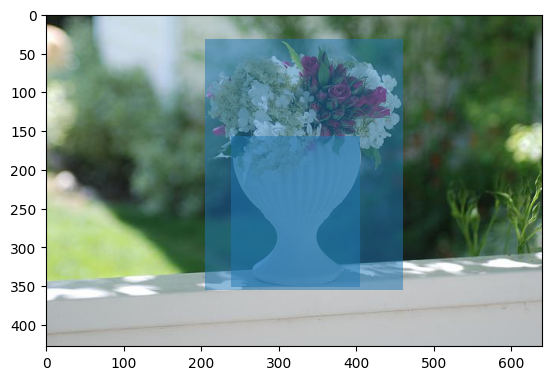

In [79]:
for bbox in bboxes:
    plt.gca().add_patch(Polygon(bbox, alpha=.5))
plt.imshow(image)
plt.show()